# Project 1: Web Scraping & Data Analysis
**Name:** Andrew Bernas
**Course:** EW442

**Instructions:**
* Complete all code sections marked `# TODO`.
* Answer all qualitative questions in your **Google Doc Answer Sheet**.

**Citations (used doc website search bar for specific methods/functions):**
* [pandas](https://pandas.pydata.org/docs/) documentation
* [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) documentation

## Part 1: Setup & Data Ingestion

In [1]:
# 1. Initialize Environment
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# 2. Define API Endpoint
base_url = "https://data.cdc.gov/resource/pwn4-m3yp.csv"
limit_param = "?$limit=50000"
url = base_url + limit_param

# 3. Ingest Data
# TODO: Read the 'url' into a dataframe named 'df'
df = pd.read_csv(url)

# 4. Inspect Data
# TODO: Display the first 5 rows and print the dataframe info to check types
df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2023-02-23T00:00:00.000,AZ,2023-02-16T00:00:00.000,2023-02-22T00:00:00.000,2434631.0,3716.0,33042.0,39.0,23150,0
1,2022-12-22T00:00:00.000,LA,2022-12-15T00:00:00.000,2022-12-21T00:00:00.000,1507707.0,4041.0,18345.0,21.0,21397,0
2,2023-02-23T00:00:00.000,GA,2023-02-16T00:00:00.000,2023-02-22T00:00:00.000,3061141.0,5298.0,42324.0,88.0,6800,0
3,2023-03-30T00:00:00.000,LA,2023-03-23T00:00:00.000,2023-03-29T00:00:00.000,1588259.0,2203.0,18858.0,23.0,5347,0
4,2023-02-02T00:00:00.000,LA,2023-01-26T00:00:00.000,2023-02-01T00:00:00.000,1548508.0,5725.0,18572.0,47.0,4507,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10380 entries, 0 to 10379
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_updated         10380 non-null  object 
 1   state                10380 non-null  object 
 2   start_date           10380 non-null  object 
 3   end_date             10380 non-null  object 
 4   tot_cases            10380 non-null  float64
 5   new_cases            10380 non-null  float64
 6   tot_deaths           10380 non-null  float64
 7   new_deaths           10380 non-null  float64
 8   new_historic_cases   10380 non-null  int64  
 9   new_historic_deaths  10380 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 811.1+ KB


In [3]:
df.describe()

,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
count,1.038000e+04,10380.000000,10380.000000,10380.000000,10380.000000,10380.000000
mean,8.326044e+05,10082.613487,10865.156936,108.959538,6.236609,0.270424
std,1.427126e+06,26464.430952,16343.375401,243.694567,324.739917,13.634253
min,0.000000e+00,0.000000,0.000000,-3442.000000,0.000000,-17.000000
25%,2.900475e+04,665.750000,536.000000,5.000000,0.000000,0.000000
50%,3.009370e+05,3102.000000,4215.000000,35.000000,0.000000,0.000000
75%,1.000664e+06,9935.000000,14557.500000,104.000000,0.000000,0.000000
max,1.225182e+07,790954.000000,101886.000000,4915.000000,23150.000000,1109.000000


### 🛑 Deliverable 1
*Switch to your Google Doc and answer Question 1 regarding row counts and data types.*

## Part 2: Data Cleaning & Manipulation

In [4]:
# 1. Cast Data Types
# TODO: Convert the 'start_date' column to datetime objects using pd.to_datetime()
# Convert start_date to datetime objects
df['start_date'] = pd.to_datetime(df['start_date'])

# Verify the change
# print(df.dtypes)

# 2. Feature Engineering
# TODO: Create a new column 'cumulative_deathrate' calculated as tot_deaths / tot_cases
df['cumulative_deathrate'] = df['tot_deaths'] / df['tot_cases']

# 3. Filtering
# TODO: Create a new dataframe 'df_md' that contains ONLY data where state equals 'MD'
df_md = df[df['state'] == 'MD']

# 4. Indexing
# TODO: Set the index of df_md to be the 'start_date' column
df_md.set_index('start_date', inplace=True)

# Verify your work
df_md.head()

,date_updated,state,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths,cumulative_deathrate
start_date,,,,,,,,,,
2020-01-16,2020-01-23T00:00:00.000,MD,2020-01-22T00:00:00.000,0.0,0.0,0.0,0.0,0,0,NaN
2020-01-23,2020-01-30T00:00:00.000,MD,2020-01-29T00:00:00.000,0.0,0.0,0.0,0.0,0,0,NaN
2020-01-30,2020-02-06T00:00:00.000,MD,2020-02-05T00:00:00.000,0.0,0.0,0.0,0.0,0,0,NaN
2020-02-06,2020-02-13T00:00:00.000,MD,2020-02-12T00:00:00.000,0.0,0.0,0.0,0.0,0,0,NaN
2020-02-13,2020-02-20T00:00:00.000,MD,2020-02-19T00:00:00.000,0.0,0.0,0.0,0.0,0,0,NaN


## Part 3: Visualization

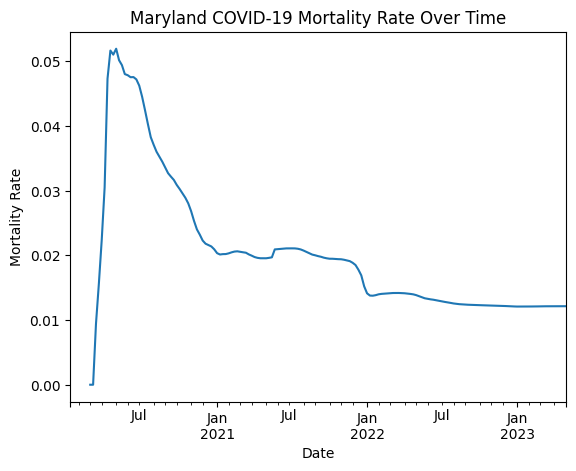

Maximum death rate in Maryland: 0.051936113983683786


In [5]:
# 1. Plotting
# TODO: Plot the 'cumulative_deathrate' column for Maryland.
# TODO: Ensure your plot has a Title and Axis Labels.
df_md['cumulative_deathrate'].plot(kind='line', title='Maryland COVID-19 Mortality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.show()

# 2. Metric Extraction
# TODO: Programmatically calculate the maximum death rate in MD and print it.
max_death_rate = df_md['cumulative_deathrate'].max()
print(f"Maximum death rate in Maryland: {max_death_rate}")

### 🛑 Deliverable 2
*Switch to your Google Doc and answer Question 2 regarding the lethality trend in Maryland.*

## Part 4: Dynamic Dashboard (Manual Build)

Dropdown(description='State:', index=5, options=('AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', '…

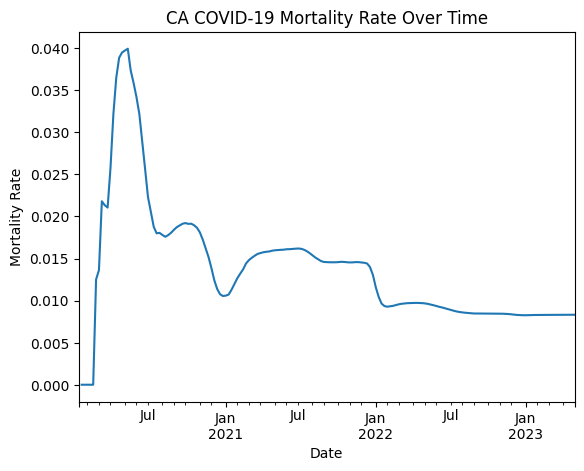



Maximum death rate in CA: 0.03992973126958504
Minimum death rate in CA: 0.0
Current death rate in CA: 0.008315988971434448


In [6]:
# 1. Imports for Interactive Widgets
# We only import what we haven't used yet (pandas and plt are already loaded)
import ipywidgets as widgets
from IPython.display import display, clear_output
pd.options.mode.copy_on_write = True

# 2. Create State List
# [Student Code: Extract sorted unique states from df]
sorted_by_state_df = df.sort_values(by='state')
states_list = sorted_by_state_df['state'].unique()
# print(states_list)

# 3. Create Dropdown Widget
# [Student Code: Create a widget variable named 'dropdown' populated with states_list]
dropdown = widgets.Dropdown(
    options=states_list,
    value=states_list[0],
    description='State:',
    disabled=False,
)
# display(dropdown)

# 4. Define Callback Function
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # Clear previous output so graphs don't stack
        clear_output(wait=True)
        # Re-display the dropdown so it remains visible
        display(dropdown)
        print("\n")

        # Get the new state value
        selected_state = change['new']

        # [Student Code: Filter df for selected_state (create a temporary dataframe)]
        temp_df = df[df['state'] == selected_state]

        # [Student Code: Ensure start_date is set as the index for your temp dataframe]
        temp_df.set_index('start_date', inplace=True)

        # [Student Code: Calculate cumulative_deathrate for this specific state]
        temp_df['cumulative_deathrate'] = temp_df['tot_deaths'] / temp_df['tot_cases']

        # [Student Code: Plot death rate vs start_date with Title]
        temp_df['cumulative_deathrate'].plot(kind='line', title=f'{selected_state} COVID-19 Mortality Rate Over Time')
        plt.xlabel('Date')
        plt.ylabel('Mortality Rate')
        plt.show()

        # [Student Code: Print Max/Min death rates]
        max_death_rate = temp_df['cumulative_deathrate'].max()
        min_death_rate = temp_df['cumulative_deathrate'].min()
        current_death_rate = temp_df['cumulative_deathrate'].iloc[-1]
        print("\n")
        print(f"Maximum death rate in {selected_state}: {max_death_rate}")
        print(f"Minimum death rate in {selected_state}: {min_death_rate}")
        print(f"Current death rate in {selected_state}: {current_death_rate}")

# 5. Attach Observer
# [Student Code: Link the 'dropdown' to 'on_change' using .observe()]
dropdown.observe(on_change)

# 6. Display
# [Student Code: Display the dropdown to start the tool]
display(dropdown)

### 🛑 Deliverable 3
*Use the dashboard you just built to compare two states. Record your findings in your Google Doc (Question 3).*